In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
customers = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




*   **CustomerID** : Id do cliente
*   **Gender** : Gênero do Cliente (Masculino: Male, Feminino: Female)
*   **Age** : Idade do consumidor (em anos)
*   **Annual Income** : Renda Anual do Cliente
*   **Spending Score** : Pontual sobre os gastos e comportamento do cliente



In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#verificando a existência de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customers.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [7]:
customers['Gender'].count()


200

In [8]:
customers_null = customers
for col in customers_null.columns:
  customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

print(customers_null)
print("====A======")
print(customers_null.sample(frac=0.1))
print("===B=======")
print(customers_null.isnull().sum())
print("=====C=====")
customers_null.isnull().count()

     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1.0    Male  19.0                15.0                    39.0
1           NaN    Male  21.0                15.0                    81.0
2           3.0  Female  20.0                16.0                     6.0
3           4.0  Female  23.0                16.0                    77.0
4           5.0     NaN  31.0                17.0                    40.0
..          ...     ...   ...                 ...                     ...
195         NaN  Female  35.0               120.0                    79.0
196       197.0  Female   NaN               126.0                    28.0
197       198.0    Male  32.0               126.0                    74.0
198       199.0    Male   NaN               137.0                    18.0
199       200.0    Male   NaN               137.0                    83.0

[200 rows x 5 columns]
====A======
     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
17

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [9]:
customers_null.info()
print(customers_null['Gender'][1:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
1      Male
2    Female
3    Female
4       NaN
5    Female
6    Female
7    Female
8      Male
9       NaN
Name: Gender, dtype: object


In [10]:
x = customers_null.dropna()
x.info()
print(x)
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              118 non-null    float64
 1   Gender                  118 non-null    object 
 2   Age                     118 non-null    float64
 3   Annual Income (k$)      118 non-null    float64
 4   Spending Score (1-100)  118 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.5+ KB
     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1.0    Male  19.0                15.0                    39.0
2           3.0  Female  20.0                16.0                     6.0
3           4.0  Female  23.0                16.0                    77.0
6           7.0  Female  35.0                18.0                     6.0
7           8.0  Female  23.0                18.0                    94.0
..          ...     ...   ...

In [11]:
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customers_null.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,99.788889,38.627778,60.283333,49.427778
std,57.129960,13.837860,26.743406,25.366373
min,1.000000,18.000000,15.000000,1.000000
25%,49.750000,28.000000,41.500000,33.500000
50%,99.500000,36.000000,60.500000,49.500000
75%,147.250000,49.000000,78.000000,71.250000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
## Substitui todos os nulos pelo valor médio da coluna
customers_null2 = customers_null.fillna(customers_null.mean())

In [14]:
customers_null.info()
customers_null2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float6

In [15]:
print("----")
customers_null.describe()


----


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,99.788889,38.627778,60.283333,49.427778
std,57.129960,13.837860,26.743406,25.366373
min,1.000000,18.000000,15.000000,1.000000
25%,49.750000,28.000000,41.500000,33.500000
50%,99.500000,36.000000,60.500000,49.500000
75%,147.250000,49.000000,78.000000,71.250000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
print("------")
customers_null2.describe()

------


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,99.788889,38.627778,60.283333,49.427778
std,54.183106,13.124081,25.363939,24.057935
min,1.000000,18.000000,15.000000,1.000000
25%,54.750000,29.000000,43.000000,35.750000
50%,99.788889,38.000000,60.283333,49.427778
75%,142.250000,48.000000,77.000000,61.500000
max,200.000000,70.000000,137.000000,99.000000


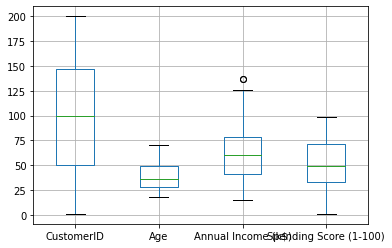

In [17]:
boxplot = customers.boxplot(column=['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)'])


In [18]:
customers.mean()

CustomerID                99.788889
Age                       38.627778
Annual Income (k$)        60.283333
Spending Score (1-100)    49.427778
dtype: float64

In [19]:
## Outra forma de encontrar outlayers. Usando o desvio normal em desvios padrões.
from scipy import stats
## print(customers['Annual Income (k$)'].values)
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
##print(z)
threshold = 2
result = np.where(z > threshold)
print(result)
df_salario_outlayer = customers.iloc[result[0]]

print(df_salario_outlayer)
## df_salario_outlayer

(array([], dtype=int64),)
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


[]

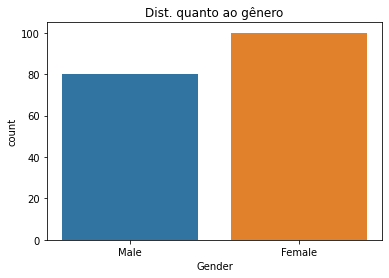

In [20]:
## Imprime histograma por gênero
sns.countplot(x="Gender", data=customers)
plt.title("Dist. quanto ao gênero")
plt.plot()

[]

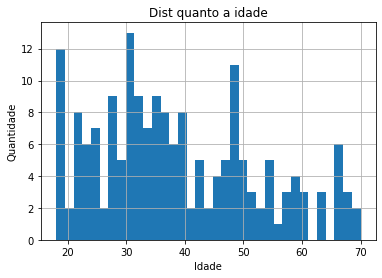

In [21]:
# Distribuição quanto a idade
customers.hist('Age', bins=35)
plt.title("Dist quanto a idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.plot()

In [25]:
## Selecionando 1 coluna de tipo específico ( por exemplo gênero que é object )
cat_df_customers = customers.select_dtypes(include=['object'])
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [30]:
replace_map = {'Gender':{'Female':1, 'Male':2}}
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()
replace_map_comp = {'Gender' : {k:v for k,v in zip(labels, list(range(1,len(labels)+1))) }}
print(replace_map_comp)
print(labels)
print(replace_map)

{'Gender': {'Female': 1, 'Male': 2}}
['Female', 'Male']
{'Gender': {'Female': 1, 'Male': 2}}


In [34]:
## Substituindo os valores de uma coluna
print(replace_map_comp)
customers_replace = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
customers_replace['Gender_str'] = customers_replace['Gender']
customers_replace.replace(replace_map_comp, inplace=True)
customers_replace.head()

{'Gender': {'Female': 1, 'Male': 2}}


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_str
0,1,2,19,15,39,Male
1,2,2,21,15,81,Male
2,3,1,20,16,6,Female
3,4,1,23,16,77,Female
4,5,1,31,17,40,Female


In [47]:
## Filtrando e selecionando colunas
## df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]
customers_replace.loc[customers_replace['Gender'] == 1, ['Gender_str', 'Age', 'CustomerID']].head()

,Gender_str,Age,CustomerID
2,Female,20,3
3,Female,23,4
4,Female,31,5
5,Female,22,6
6,Female,35,7


In [52]:
## Usando o label Encodering do Pandas
customers = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
cat_df_customers_lc = customers
cat_df_customers_lc['Gender_str'] = cat_df_customers_lc['Gender']
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes


CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Gender_str                  object
dtype: object

In [53]:
cat_df_customers_lc.head()
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_str
0,1,1,19,15,39,Male
1,2,1,21,15,81,Male
2,3,0,20,16,6,Female
3,4,0,23,16,77,Female
4,5,0,31,17,40,Female


In [56]:
#Usando o label encoding do sklearn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

customers_label = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
customers_label['Gender_Str'] = customers_label['Gender']
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Str
0,1,1,19,15,39,Male
1,2,1,21,15,81,Male
2,3,0,20,16,6,Female
3,4,0,23,16,77,Female
4,5,0,31,17,40,Female


In [58]:
# Usando o One Hot Encoding (Transforma cada categoria em uma coluna com 1/0)
# usando o pandas

customers_hot_enc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
customers_hot_enc = pd.get_dummies(customers_hot_enc)
customers_hot_enc.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [63]:
# Usando o One Hot Encoding (Transforma cada categoria em uma coluna com 1/0)
# usando o Sklearn

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

customers_ohe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/atividade-pratica-1/Mall_Customers.csv")
customers_xxx = ohe.fit_transform(customers_ohe['Gender'].values.reshape(-1,1)) ##.toarray()
## customers_xxx.shape
print(customers_xxx)


  (0, 1)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (175, 0)	1.0
  (176, 1)	1.0
  (177, 1)	1.0
  (178, 1)	1.0
  (179, 1)	1.0
  (180, 0)	1.0
  (181, 0)	1.0
  (182, 1)	1.0
  (183, 0)	1.0
  (184, 0)	1.0
  (185, 1)	1.0
  (186, 0)	1.0
  (187, 1)	1.0
  (188, 0)	1.0
  (189, 0)	1.0
  (190, 0)	1.0
  (191, 0)	1.0
  (192, 1)	1.0
  (193, 0)	1.0
  (194, 0)	1.0
  (195, 0)	1.0
  (196, 0)	1.0
  (197, 1)	1.0
  (198, 1)	1.0
  (199, 1)	1.0
